## ${\textbf{Libraries}}$

In [109]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## ${\textbf{Data Import}}$

In [110]:
df_purchase = pd.read_csv('purchase data.csv')

## ${\textbf{Data Exploration}}$

In [111]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [112]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

## ${\textbf{Data Segmentation}}$

### ${\textbf{Import Segmentation Model}}$

In [113]:
scaler = pickle.load(open('scaler.pickle', 'rb'))

In [114]:
pca = pickle.load(open('pca.pickle', 'rb'))

In [115]:
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

### ${\textbf{Standardization}}$

In [116]:
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
# Note that we will not fit the scaler and the PCA objects. We will only transform the data using them

### ${\textbf{PCA}}$

In [117]:
pca_scores = pca.transform(df_purchase_segm_std)

### ${\textbf{K-means PCA}}$

In [118]:
# Based on the principal components, we use the predict method from pca to segment the purchase data into the four segments.
purchase_segm_kmeans_pca = kmeans_pca.predict(pca_scores)

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [119]:
df_purchase_predictors = df_purchase.copy()

In [120]:
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

## ${\textbf{Descriptive Analysis by Segments}}$

### ${\textbf{Data Analysis by Customer}}$

In [121]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1


In [122]:
# Purchase occasions by customer ID
temp1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence': 'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [123]:
# Number of purchases per customer ID
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence': 'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [124]:
# Average number of purchases by customer ID
temp3['Average_N_Purchases'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [125]:
# Segment for each customer
temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index = False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)

In [131]:
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,1
200000002,87,11,0.126437,0
200000003,97,10,0.103093,1
200000004,85,11,0.129412,1
200000005,111,13,0.117117,3


### ${\textbf{Segment Proportions}}$

In [127]:
# We calculate the proportions of each segment and set the appropriate column name. 
segm_prop = df_purchase_descr[['N_Purchases', 'Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchases': 'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0,0.196
1,0.376
2,0.208
3,0.220


Text(0.5, 1.0, 'Segment Proportions')

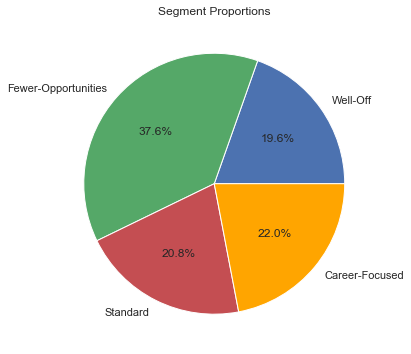

In [129]:
# We plot the segment proportions as a pie chart. 
# We can easily see which is the largest segment and the relative sizes of each segment.
plt.figure(figsize = (9, 6))
plt.pie(segm_prop['Segment Proportions'],
        labels = ['Well-Off', 'Fewer-Opportunities', 'Standard', 'Career-Focused'],
        autopct = '%1.1f%%', 
        colors = ('b', 'g', 'r', 'orange'))
plt.title('Segment Proportions')

### ${\textbf{Purchase Occasion and Purchase Incidence}}$

In [132]:
# We calculate the mean by the four segments. It will help us determine the average customer behaivour in each segment.
segments_mean = df_purchase_descr.groupby(['Segment']).mean()

In [133]:
# We calculate the standard deviation by segments. It will help us determine how homogoneus each of the segments is.
segments_std = df_purchase_descr.groupby(['Segment']).std()

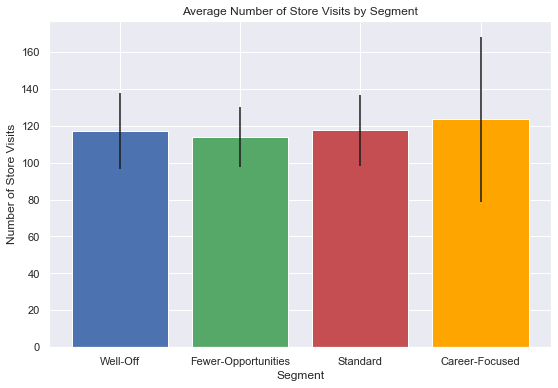

In [135]:
# We plot the average number of store visits for each of the four segments using a bar chart.
# We display the standard deviation as a straight line. The bigger the length, the higher the standard deviation is.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Well-Off', 'Fewer-Opportunities', 'Standard', 'Career-Focused'), 
        height = segments_mean['N_Visits'],
        yerr = segments_std['N_Visits'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment')
plt.show()

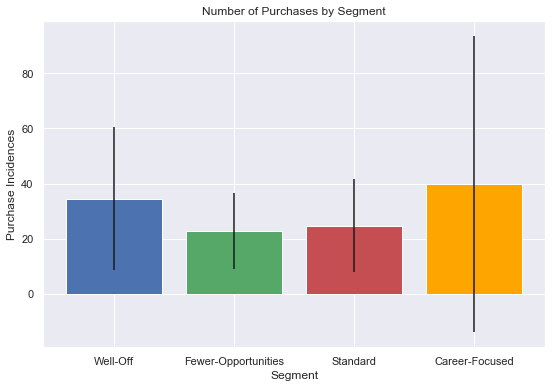

In [136]:
# We display the average number of purchases by segments. 
# They will help us understand how often each group buys chocholate candy bars.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Well-Off', 'Fewer-Opportunities', 'Standard', 'Career-Focused'), 
        height = segments_mean['N_Purchases'],
        yerr = segments_std['N_Purchases'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Number of Purchases by Segment')
plt.show()

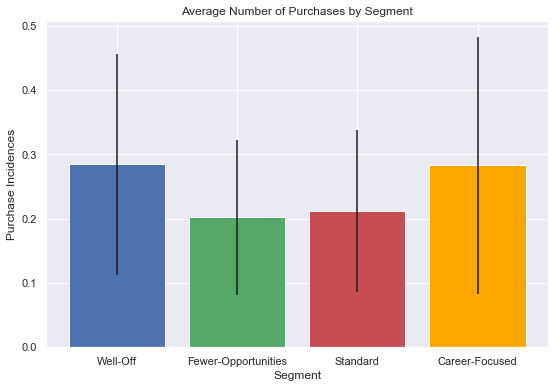

In [137]:
# We display the average number of purchases.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3), 
        tick_label = ('Well-Off', 'Fewer-Opportunities', 'Standard', 'Career-Focused'),
        height = segments_mean['Average_N_Purchases'], 
        yerr = segments_std['Average_N_Purchases'], 
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Average Number of Purchases by Segment')
plt.show()

### ${\textbf{Brand Choice}}$

In [138]:
# Select only rows where incidence is one. In other words, we are only interested in the times a purchase was made.
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]
df_purchase_incidence

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,1
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,1
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,1
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,1
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,0,0,0,0,42,1,120946,1,0,1
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,0,0,0,0,42,1,120946,1,0,1
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,0,0,0,0,42,1,120946,1,0,1
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,0,0,0,0,42,1,120946,1,0,1


In [139]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,1,200000001
11,0,0,0,0,1,1,200000001
19,1,0,0,0,0,1,200000001
24,0,0,0,1,0,1,200000001
29,0,1,0,0,0,1,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,1,200000500
58648,1,0,0,0,0,1,200000500
58674,0,1,0,0,0,1,200000500
58687,0,1,0,0,0,1,200000500


In [140]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()

In [141]:
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()

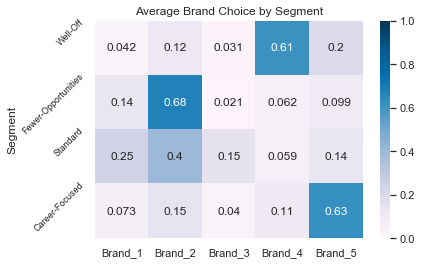

In [142]:
sns.heatmap(mean_brand_choice,
            vmin = 0, 
            vmax = 1,
            cmap = 'PuBu',
            annot = True)
plt.yticks([0, 1, 2, 3], ['Well-Off', 'Fewer-Opportunities', 'Standard', 'Career-Focused'], rotation = 45, fontsize = 9)
plt.title('Average Brand Choice by Segment')
plt.show()

### ${\textbf{Revenue}}$

In [143]:
# Compute the revenue for brand 1.
# For each entry where Brand 1 was purchased, 
# we multiply the price of the brand for that particular day by the quantity of the product purchased.
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Segment,Revenue Brand 1
0,0,699.47
1,1,2258.90
2,2,2611.19
3,3,736.09


In [144]:
# Compute revenue for brand 2. We use the same formula, but here we filter our data to contain only purchases of brand 2.
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index = False).sum()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [145]:
# Compute revenue for brand 3
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 3']] = temp[['Revenue Brand 3','Segment']].groupby(['Segment'], as_index = False).sum()

In [146]:
# Compute revenue for brand 4
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 4']] = temp[['Revenue Brand 4','Segment']].groupby(['Segment'], as_index = False).sum()

In [147]:
# Compute revenue for brand 5
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']] = temp[['Revenue Brand 5','Segment']].groupby(['Segment'], as_index = False).sum()

In [148]:
# We compute the total revenue for each of the segments. We simply sum the revenue for each of the five brands.
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                           segments_brand_revenue['Revenue Brand 2'] +
                                           segments_brand_revenue['Revenue Brand 3'] +
                                           segments_brand_revenue['Revenue Brand 4'] +
                                           segments_brand_revenue['Revenue Brand 5'] )
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,699.47,1298.23,731.35,14185.57,5509.69,22424.31
1,1,2258.90,13868.30,716.25,1629.31,2230.50,20703.26
2,2,2611.19,4855.36,3909.17,861.38,2439.75,14676.85
3,3,736.09,1746.42,664.75,2363.84,19441.06,24952.16


In [149]:
# We further modify our table to include the segment proportions. 
# It is interesting to see the size of the segment compared to the revenue they bring.
# We also add the labels for the segments.s
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'Well-Off',
                                                                           1:'Fewer-Opportunities',
                                                                           2:'Standard',
                                                                           3:'Career-Focused'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
Fewer-Opportunities,2258.90,13868.30,716.25,1629.31,2230.50,20703.26,0.376
Standard,2611.19,4855.36,3909.17,861.38,2439.75,14676.85,0.208
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
